<p>Dataset: <br>

Danni Li ; Vanessa Pang; Zunquan Wang; Diane Xu; Zibo Shang <br>

Introduction: <br>
Preliminary exploratory data analysis: <br>
Methods: <br>
Expected outcomes and significance :<br>

Title: 

Introduction:

Preliminary exploratory data analysis:

Methods:

Expected outcomes and significance:

In [29]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [30]:
download.file("http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip","bank.zip")
unzip("bank.zip", "bank-full.csv")
bank <- read.table("bank-full.csv", sep=";", header = TRUE)
bank

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


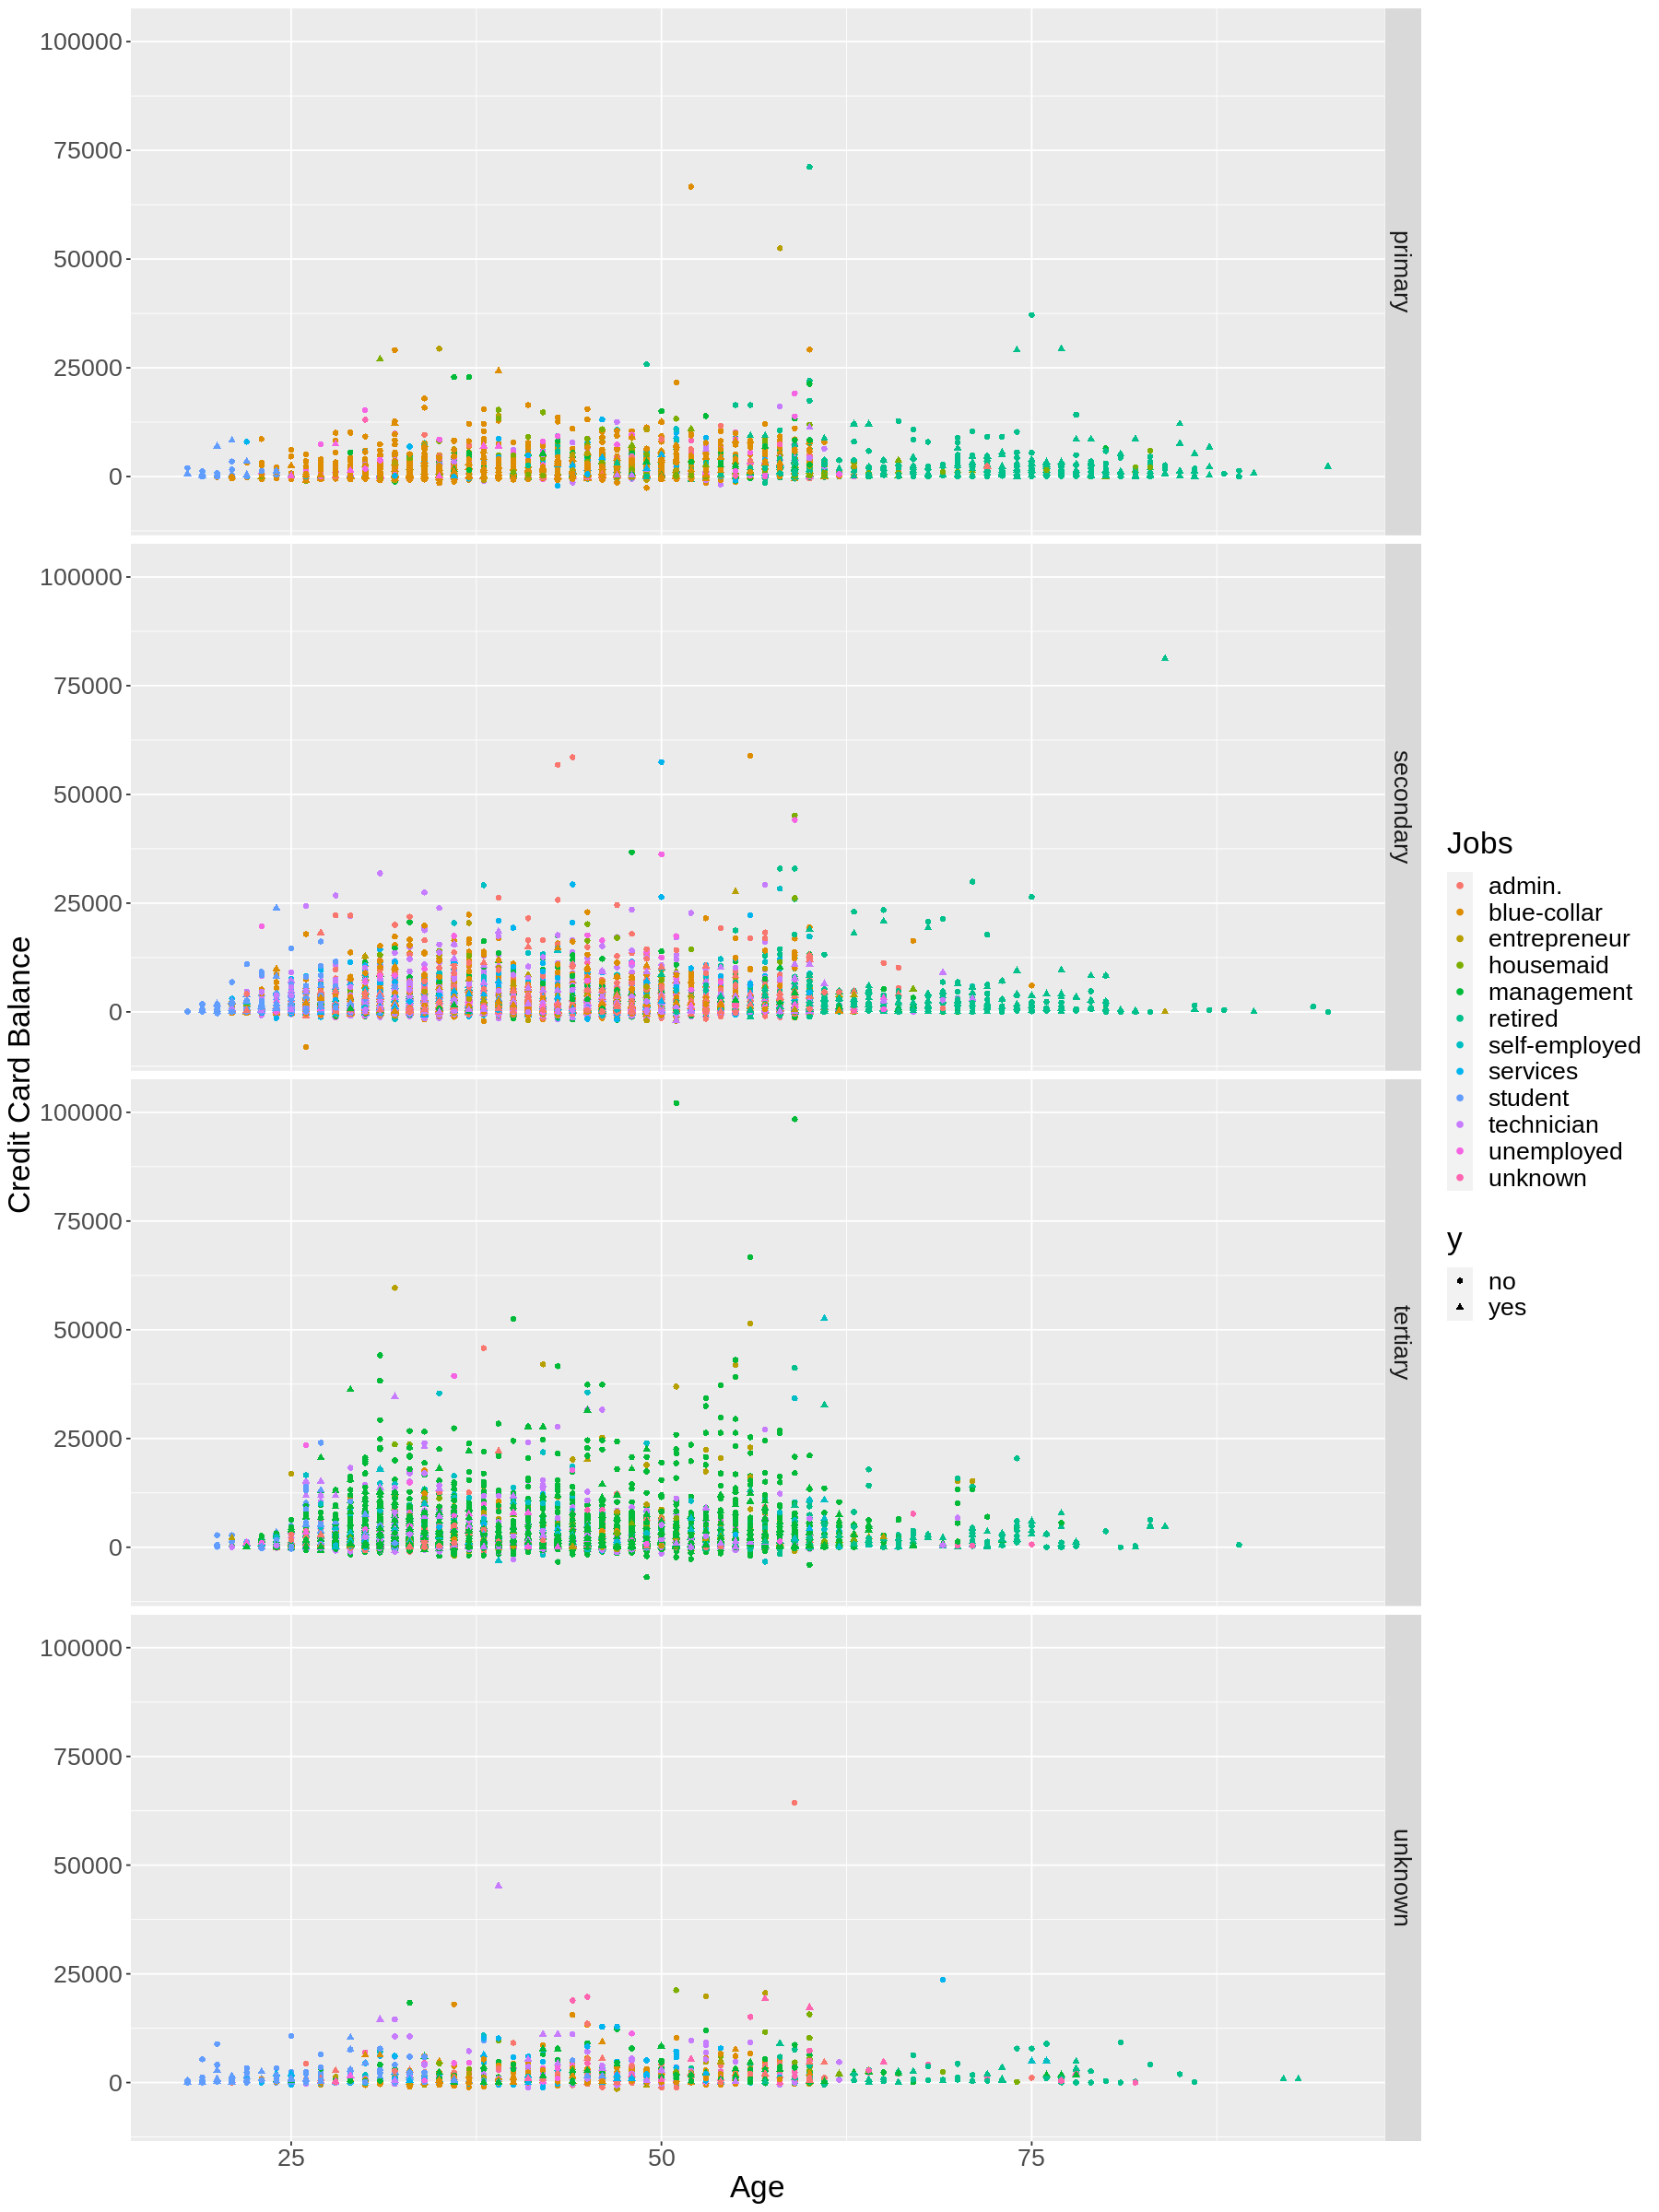

In [31]:
#some simple visualization
options(repr.plot.width = 15, repr.plot.height = 20) 
age_balance_plot <- bank %>%
    ggplot(aes(x = age, y =  balance)) + 
        geom_point(aes(colour = job, shape = y)) +
        labs(x = "Age", y = "Credit Card Balance", colour = "Jobs", Shape = "Subscribed a term deposit?") + 
        facet_grid(education~.) +
        theme(text = element_text(size=20))

age_balance_plot

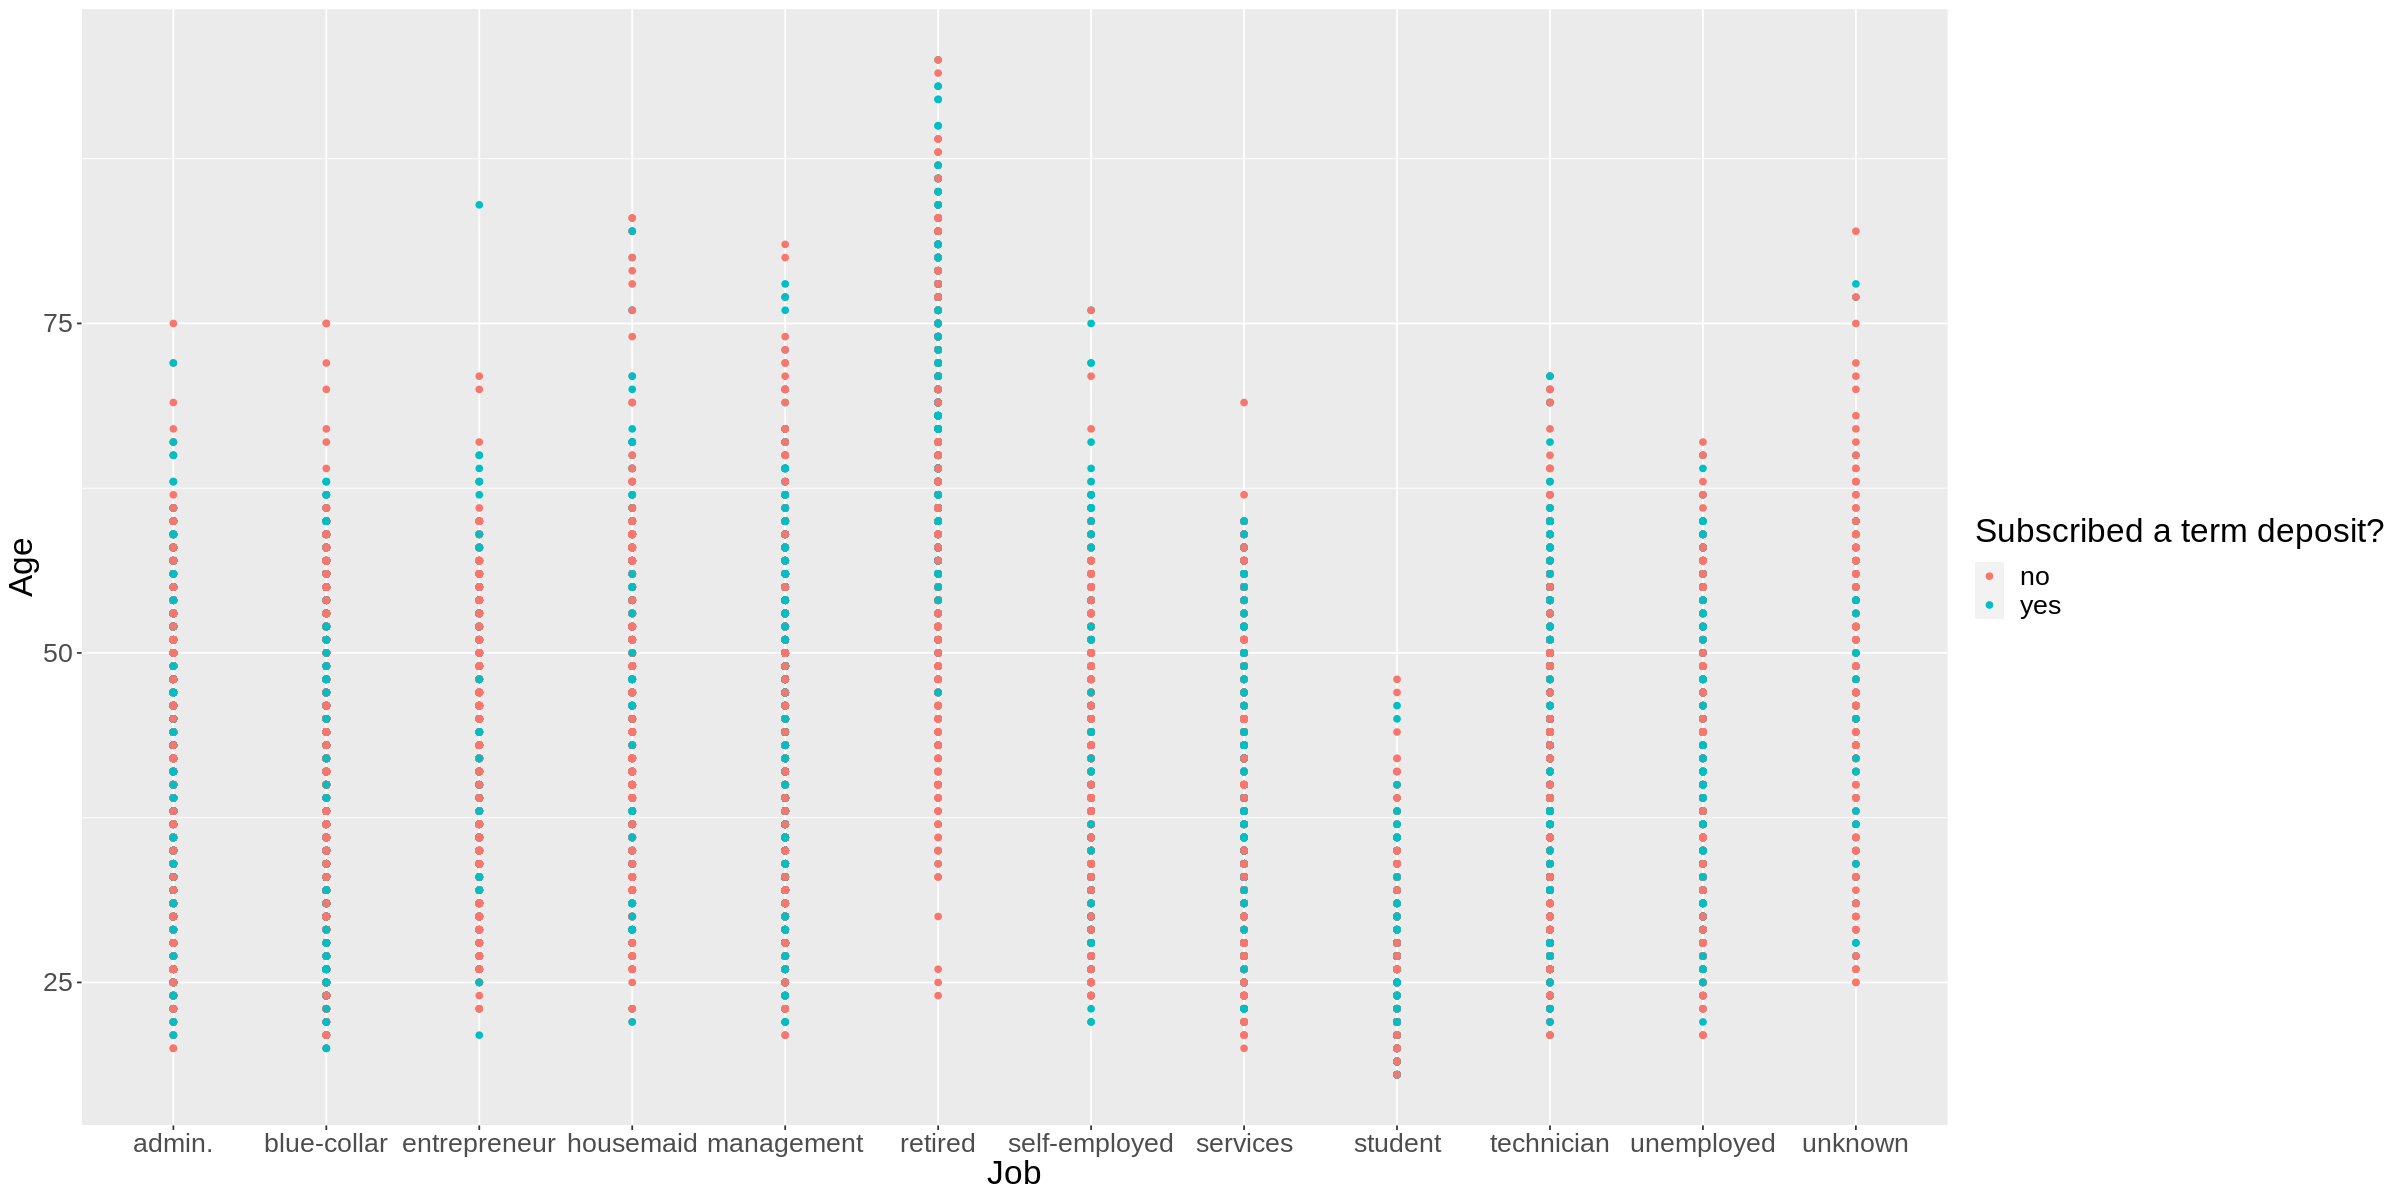

In [32]:
#that seemed a bit too much, lets try age, y and job
options(repr.plot.width = 20, repr.plot.height = 10) 
age_job_plot <- bank %>%
    ggplot(aes(x = job, y =  age)) + 
        geom_point(aes(colour = y)) +
        labs(x = "Job", y = "Age", colour = "Subscribed a term deposit?") +
        theme(text = element_text(size=20))

age_job_plot